## TM polarization
We should be able to see surface plasmons for a metal-air interface

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from eigenwell.src import grid,eigen_w, structure
from eigenwell.src.constants import *
import scipy.sparse.linalg as la
from eigenwell.src import filter


(100, 100)
(10000, 10000)


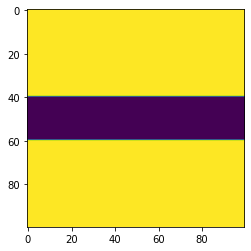

In [2]:
Nx = 100;
Ny = 100;
N = np.array([Nx, Ny]);

eps_r = np.ones(N);

a = np.array([1,1])*1e-6;
dL = a/N;
## put in a circle;
ci = int(Nx/2); cj= int(Ny/2);

eps_r = eps_r.astype('complex')
eps_r[40:60,:] = -2+1e-2*1j;

print(eps_r.shape)

plt.imshow(np.real(eps_r))
wvlen_scan = np.linspace(1.01, 20, 100);
wvlen_scan = np.logspace(np.log10(0.8), np.log10(10), 600);


fd = grid.FiniteDifferenceGrid(dL,N)

print(fd.Dxf.shape)

omega = 2*np.pi*C0/(1e-6)

st = structure.Structure(eps_r, a)


In [3]:
eigenTM = eigen_w.EigenOmega2D(st, npml = [0,20], omega_guess = None, polarization = 'TM');


In [4]:
# # if it's wrong it takes a long time to find convergence...
# eigenvals, eigenmodes = eigenTM.eigensolve(num_modes = 5)
A = eigenTM.A;
K =10
eigenvals, eigenmodes = la.eigs(A, k=K, sigma= omega**2)


[3.95315007e+31-2.61379459e+15j 3.95315007e+31-2.83391205e+15j
 3.81697942e+31-3.26986510e+17j 4.24771042e+31+2.81509155e+20j
 3.75774437e+31+2.36477408e+30j 3.50665576e+31+2.10908934e+23j
 4.51130662e+31+2.10496855e+26j 3.46971199e+31+4.47489541e+30j
 3.24250978e+31+2.82829029e+30j 3.18755700e+31+6.49261495e+29j]


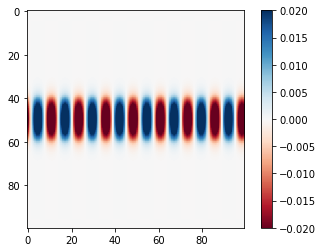

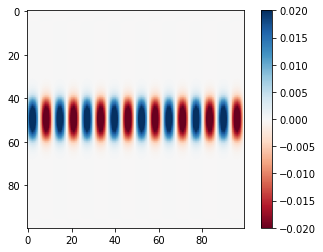

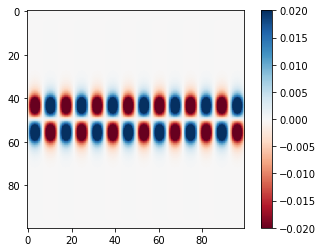

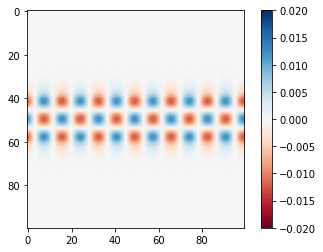

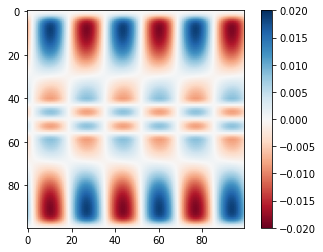

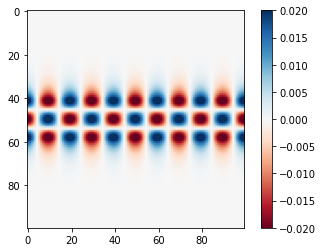

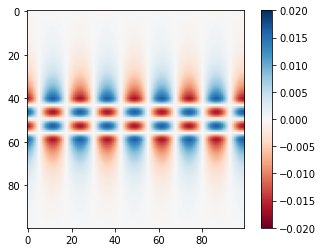

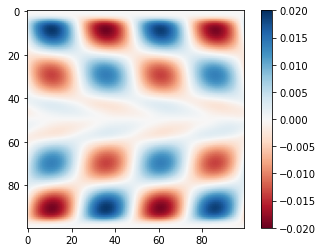

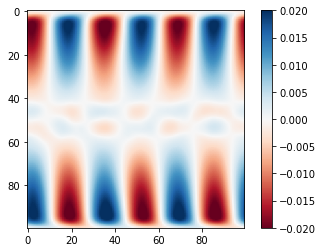

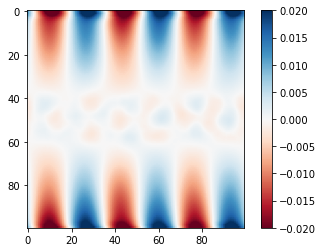

In [9]:
print(eigenvals)

for i in range(K):
    plt.imshow(np.real(eigenmodes[:,i].reshape(N, order = 'F')),cmap = 'RdBu')
    plt.clim(-0.02, 0.02)
    plt.colorbar();
    if(i == 0):
        plt.savefig('surface_plasmons.png',dpi = 300)
    plt.show();

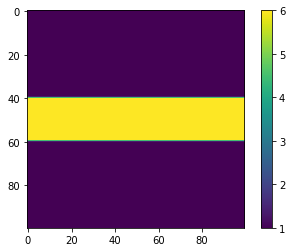

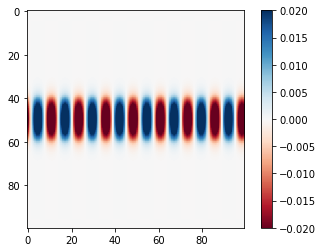

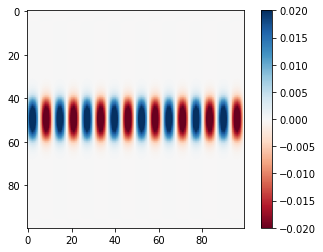

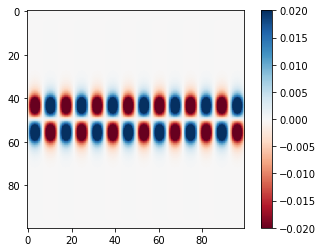

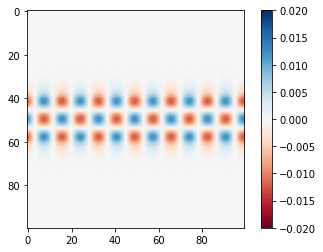

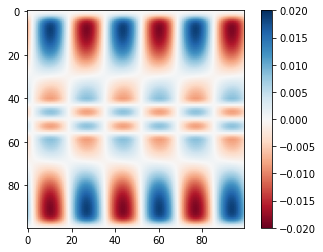

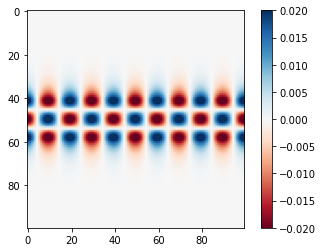

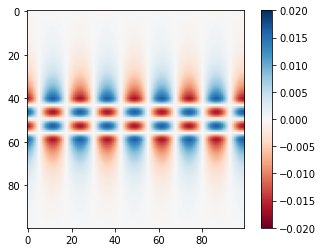

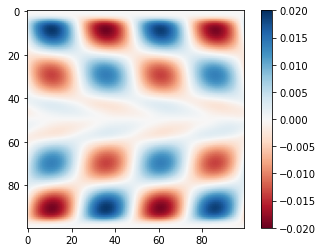

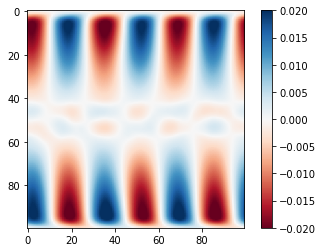

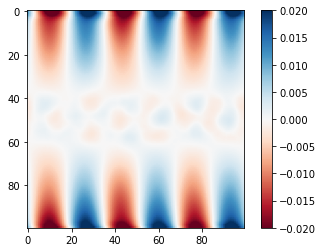

In [8]:
eps_r = np.ones(N)
eps_r[40:60,:] = 6;
plt.imshow(eps_r)
plt.colorbar();
plt.show();
st = structure.Structure(eps_r, a)

omega = 2*np.pi*C0/(0.3e-6)
#eigenTE = eigen_w.EigenOmega2D(st, npml = [0,5], omega_guess = omega, polarization= 'TE')# don't expose the finite difference class
eigenTE = eigen_w.EigenOmega2D(st, npml = [10,0], omega_guess = omega, polarization= 'TE')# don't expose the finite difference class


A = eigenTE.A;
K =10
eigenvals, eigenmodes = la.eigs(A, k=K, sigma= omega**2)

for i in range(K):
    plt.imshow(np.real(eigenmodes[:,i].reshape(N, order = 'F')),cmap = 'RdBu')
    plt.clim(-0.02, 0.02)
    plt.colorbar();
    if(i == 0):
        plt.savefig('dielectric_guide_mode.png',dpi = 300)
    plt.show();